In [1]:
# import Librarabries
import numpy as np
import pandas as pd
import keras
import cv2
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

In [2]:
df = pd.read_csv("train.csv")
base_path = "./image/"

In [3]:
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1048570,ae9609cad3a943fa,135467
1048571,bacd5740d47f3b04,135467
1048572,cc890b31987c36a2,135467
1048573,ce84a8aacbb7d15c,135467


In [4]:
samples = 20000
df = df.loc[df["id"].str.startswith('00', na=False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [5]:
num_classes

3539

In [6]:
num_data

4041

In [7]:
data = pd.DataFrame(df["landmark_id"].value_counts())

data.reset_index(inplace=True)
data.head()

,landmark_id,count
0,83144,14
1,126637,7
2,46705,6
3,9673,6
4,109169,6


In [8]:
data.tail()

,landmark_id,count
3534,46538,1
3535,46597,1
3536,46609,1
3537,46677,1
3538,135395,1


In [9]:
data.columns=['landmark_id','count']


In [47]:
data['count'].describe()

count    3539.000000
mean        1.141848
std         0.509600
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        14.000000
Name: count, dtype: float64

(array([3.538e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

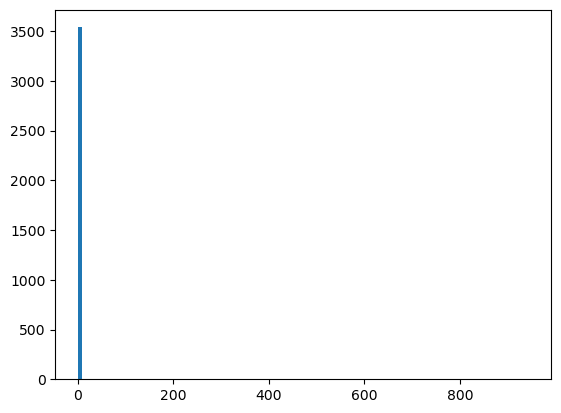

In [10]:
plt.hist(data['count'], 100, range = (0,944), label = 'test')

In [11]:
data['count'].between(0,5).sum()

3534

In [12]:
data['count'].between(5,10).sum()

9

(array([2., 1., 1., ..., 1., 1., 2.]),
 array([2.70000e+01, 6.00000e+01, 1.24000e+02, ..., 1.35308e+05,
        1.35318e+05, 1.35395e+05]),
 <BarContainer object of 3538 artists>)

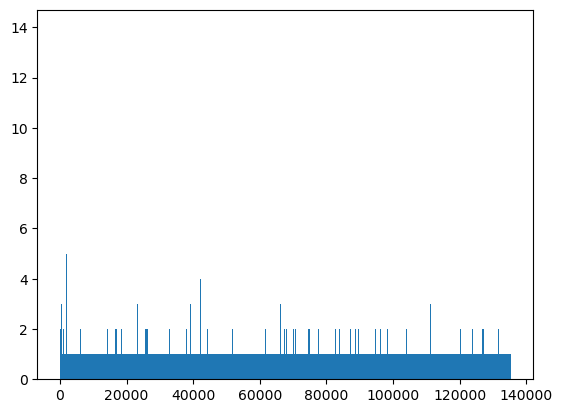

In [13]:
plt.hist(df["landmark_id"], bins=df["landmark_id"].unique())

In [14]:
from sklearn.preprocessing import LabelEncoder
lenencoder = LabelEncoder()
lenencoder.fit(df["landmark_id"])

LabelEncoder()

In [15]:
df.head()

,id,landmark_id
119,00cba0067c078490,27
120,00f928e383e1d121,27
796,009ecdb56b5e9adb,60
1089,00d5d47528839144,124
1133,00e9003a381ab809,134


In [16]:
def encode_label(lbl):
    return lencoder.transform(lbl)

In [17]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [18]:
def get_image_from_numbers(num, df):
    fname, label = df.loc[num, :]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = os.path.join(f1,f2,f3,fname)
    im = cv2.imread(os.path.join(base_path,path))
    return im, label

4 Sample images from random classes


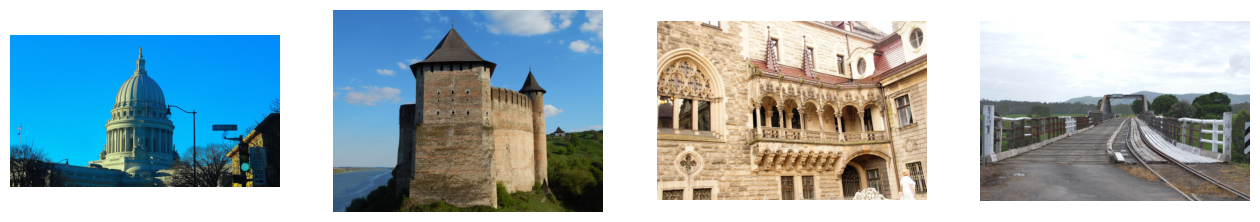

In [19]:
import os
import random
import numpy as np
from PIL import Image as image
import matplotlib.pyplot as plt

# Define the base path where your images are stored
base_path = 'image'

# Print the title
print("4 Sample images from random classes")

# Create a figure for displaying the images
fig = plt.figure(figsize=(16,16))

# Loop to display 4 random images from random classes
for i in range(1, 5):
    # Choose 3 random directories from the base path
    ri = random.choices(os.listdir(base_path), k=3)
    
    # Construct the folder path
    folder = os.path.join(base_path, ri[0], ri[2])
    
    # Choose a random image from the selected folder
    random_img = random.choice(os.listdir(folder))
    
    # Load the image
    img = np.array(image.open(os.path.join(folder, random_img)))
    
    # Add a subplot for the image
    fig.add_subplot(1, 4, i)
    plt.imshow(img)
    plt.axis('off')

# Display the plot
plt.show()

In [21]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras.models import Sequential
tf.compat.v1.enable_eager_execution()

In [22]:
# parameters
learning_rate = 0.0001
decay_speed   = 1e-6
momentum      = 0.09
loss_function = "sparse_categorical_crossentropy"
source_model  = VGG19(weights=None)
drop_layer    = Dropout(0.5)
drop_layer2   = Dropout(0.5)

In [23]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes, activation = "softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 224, 224, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 154,069,535 (587.73 MB)

 Trainable params: 154,069,529 (587.73 MB)

 Non-trainable params: 6 (24.00 B)

In [24]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop

# Enable eager execution
tf.compat.v1.enable_eager_execution()

# Define learning rate and loss function
learning_rate = 0.001
loss_function = 'categorical_crossentropy'  # or another appropriate loss function

# Define the optimizer
optimal = RMSprop(learning_rate=learning_rate)

# Create the model
model = Sequential()
model.add(VGG19(include_top=False, input_shape=(224, 224, 3)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=optimal,
              loss=loss_function,
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ ?                      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [26]:
import numpy as np

def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []

    end_img = start + batch_size
    if end_img > len(dataframe):
        end_img = len(dataframe)

    for idx in range(start, end_img):
        n = idx
        im, label = get_img_from_number(n, dataframe)  # Ensure this function is defined elsewhere
        im = image_reshape(im, (224, 224)) / 255.0  # Ensure this function is defined elsewhere
        image_array.append(im)
        label_array.append(label)

    label_array = encode_label(label_array)  # Ensure this function is defined elsewhere

    return np.array(image_array), np.array(label_array)

In [28]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

train, val = np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

3232
809


In [30]:
for e in range(epochs):
    print("Epochs: " + str(e + 1) + "/" + str(epochs))
    
    if epoch_shuffle:
        train = train.sample(frac=1)
    
    for it in range(int(np.ceil(len(train) / batch_size))):
        x_train, y_train = get_batch(train, it * batch_size, batch_size)
        model.train_on_batch(x_train, y_train)

model.save("Model")

Epochs: 1/1


NameError: name 'get_img_from_number' is not defined

In [31]:
batch_size = 16

errors = 0
good_preds = []
bad_preds = []


for it in range(int(np.ceil(len(val)/batch_size))):
    x_val, y_val = get_batch(val, it*batch_size, batch_size)

    result = model.predict(x_val)
    cla = np.argmax(result, axis=1)
    for idx, res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors = errors+1
            bad_preds.append([batch_size*it + idx], res[cla[idx]])
        else:
             good_preds.append([batch_size*it + idx], res[cla[idx]])

for i in range(1,6):
    n = int(good_preds[0])
    img, lbl = get_image_from_number(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    PLT.IMSHOW(IMG)

NameError: name 'get_img_from_number' is not defined